In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt


In [ ]:
ticker="AAPL"
data=yf.download(ticker , period="7d" , interval="5m")

data.head(5)


C:\Users\MAZEER\AppData\Local\Temp\ipykernel_26888\3669986060.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker , period="7d" , interval="5m")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-06-20 13:30:00+00:00,199.410797,199.630005,197.529999,198.235001,14021766
2025-06-20 13:35:00+00:00,200.445007,200.649994,199.376602,199.389999,2397722
2025-06-20 13:40:00+00:00,200.599503,200.940002,200.341095,200.442703,1662468
2025-06-20 13:45:00+00:00,199.770004,200.719101,199.729996,200.595001,1161399
2025-06-20 13:50:00+00:00,200.349106,200.350006,199.740005,199.779999,786238


In [ ]:
data["Price_change"] = data["Close"].pct_change()
data["Volume_change"] = data["Volume"].pct_change()

data.dropna(inplace=True)



# Basic Visualization
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f"{ticker} Close Price - 5 Min Interval")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Volume'], label='Volume', color='orange')
plt.title(f"{ticker} Volume - 5 Min Interval")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show()

# Distribution plots
data[['Price Change', 'Volume Change']].hist(bins=50, figsize=(12, 5))
plt.tight_layout()
plt.show()





In [ ]:
predictors = data[["Price_change","Volume_change"]]

scalar = StandardScaler()
X = scalar.fit_transform(predictors)

# model = SVC(kernel = , c =  ,gamma = 'Auto')


C:\Users\MAZEER\AppData\Local\Temp\ipykernel_19540\2680897439.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="7d", interval="5m")
[*********************100%***********************]  1 of 1 completed


Price                           Close        High         Low        Open  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2025-06-30 19:35:00+00:00  206.670303  207.179993  206.130005  207.175003   
2025-06-30 19:40:00+00:00  206.309998  206.919998  206.180099  206.679993   
2025-06-30 19:45:00+00:00  206.539993  206.699997  206.190002  206.320007   
2025-06-30 19:50:00+00:00  206.279999  206.630005  205.910004  206.520004   
2025-06-30 19:55:00+00:00  205.119995  206.309998  205.050003  206.279999   

Price                       Volume  
Ticker                        AAPL  
Datetime                            
2025-06-30 19:35:00+00:00  1964420  
2025-06-30 19:40:00+00:00  1478392  
2025-06-30 19:45:00+00:00  1507057  
2025-06-30 19:50:00+00:00  2261143  
2025-06-30 19:55:00+00:00  4018642  


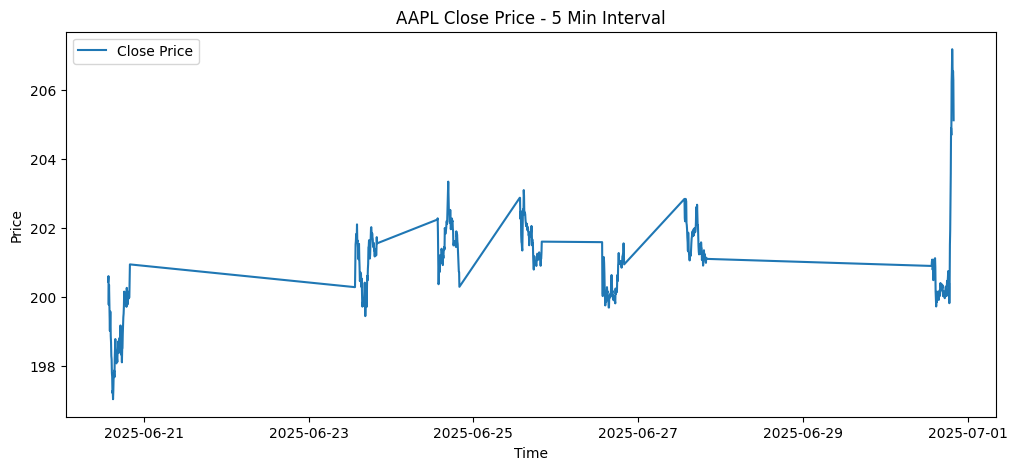

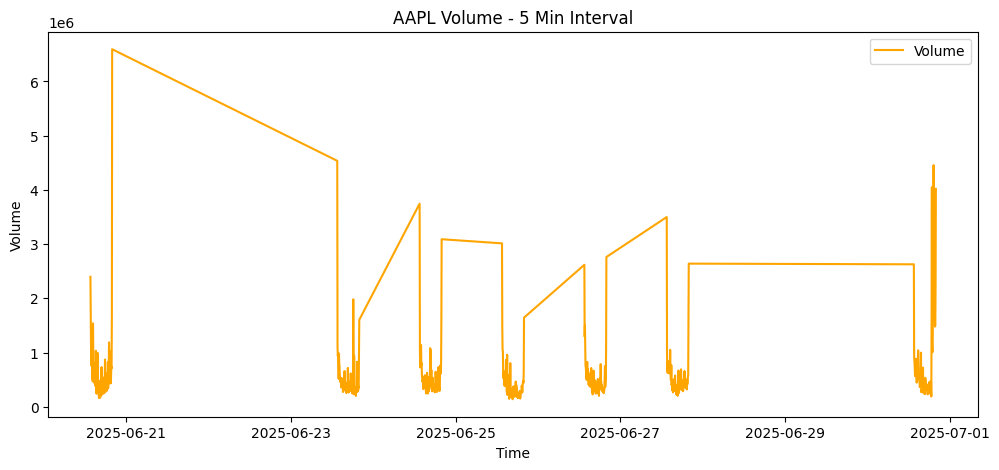

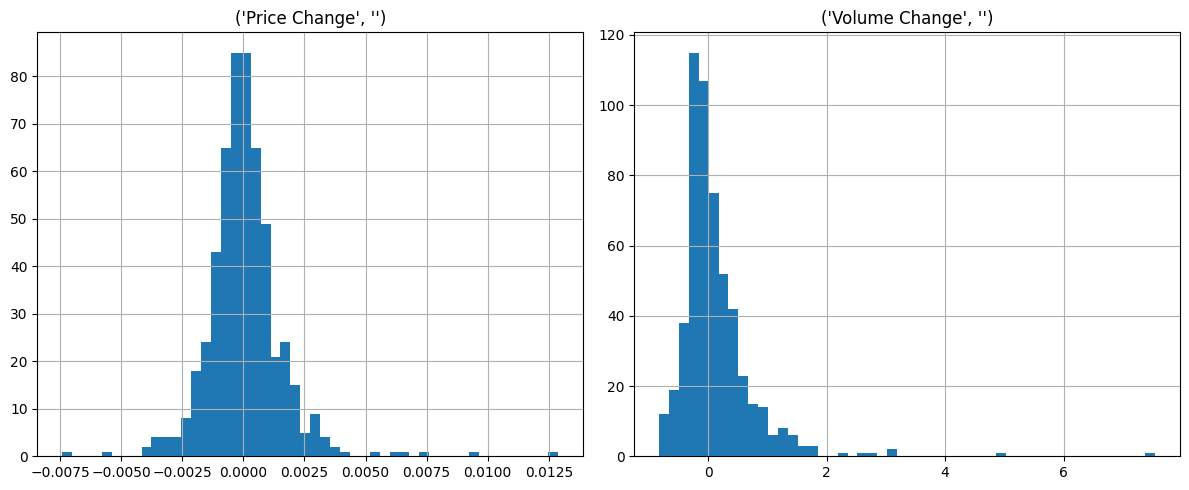

Anomaly
0    497
1     48
Name: count, dtype: int64


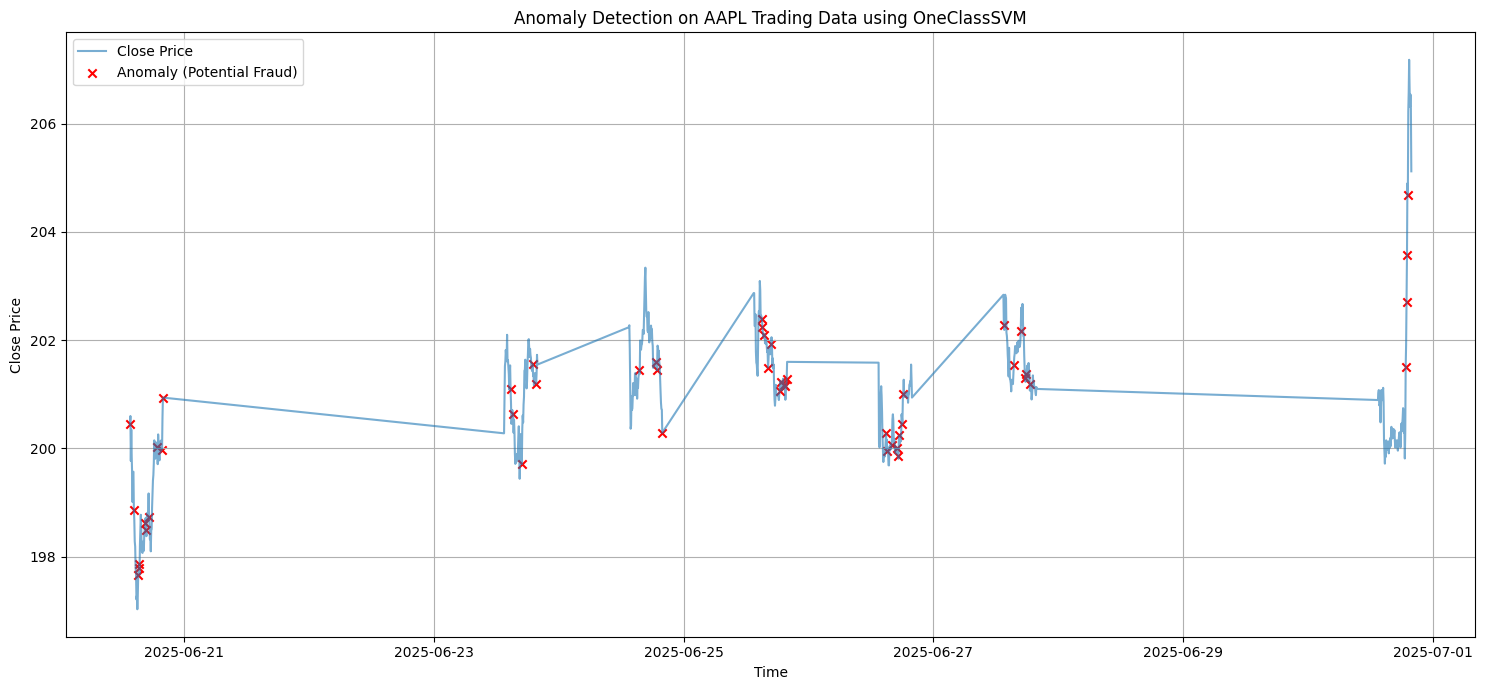

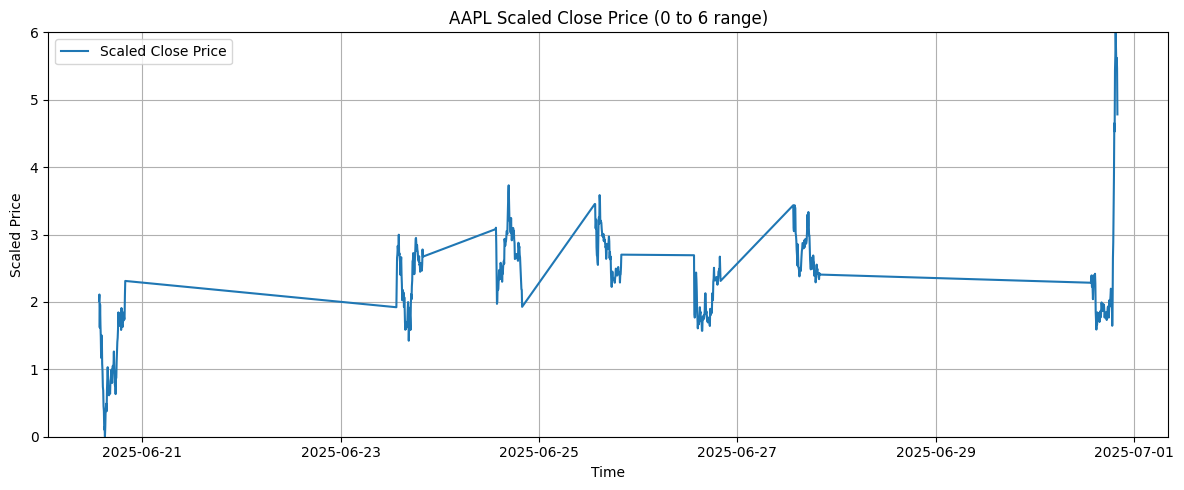

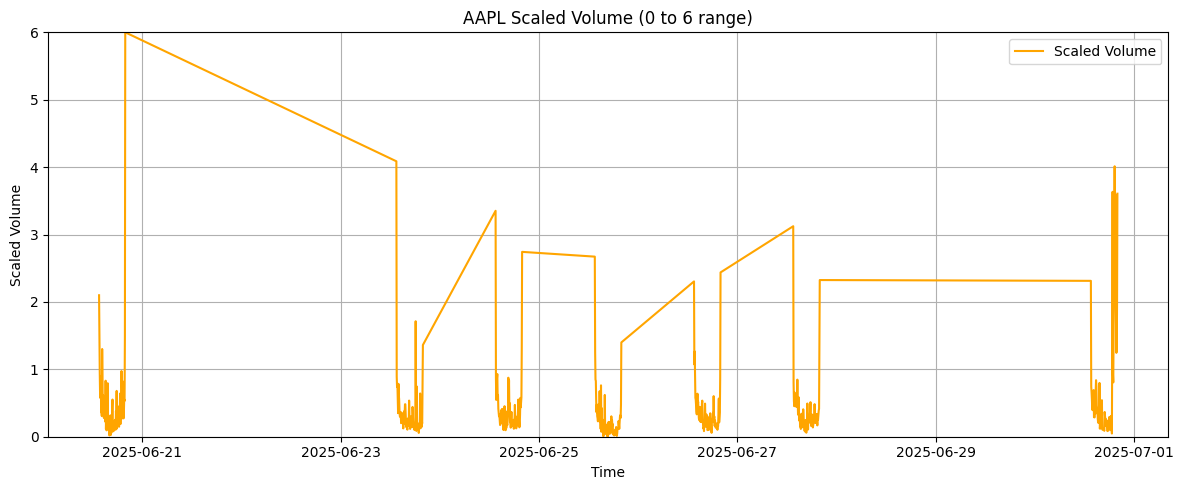

In [ ]:
## 🎯 4️⃣ Implementation Step-by-Step

### 📦 Import Libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

### 📈 Step 1: Download Data

ticker = "AAPL"
data = yf.download(ticker, period="7d", interval="5m")
print(data.tail())


### 📊 Step 2: Data Analytics & Visualization


# Feature Engineering
data['Price Change'] = data['Close'].pct_change()
data['Volume Change'] = data['Volume'].pct_change()
data.dropna(inplace=True)

# Basic Visualization
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f"{ticker} Close Price - 5 Min Interval")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Volume'], label='Volume', color='orange')
plt.title(f"{ticker} Volume - 5 Min Interval")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show()

# Distribution plots
data[['Price Change', 'Volume Change']].hist(bins=50, figsize=(12, 5))
plt.tight_layout()
plt.show()


### ⚙️ Step 3: Data Preprocessing

features = data[['Price Change', 'Volume Change']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

### 🤖 Step 4: Train OneClassSVM


svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)  # nu = proportion of expected outliers
svm_model.fit(X_scaled)


### 🔍 Step 5: Anomaly Detection


predictions = svm_model.predict(X_scaled)
# OneClassSVM returns:
#   1  -> inliers (normal)
#  -1  -> outliers (anomalies)

data['Anomaly'] = predictions
data['Anomaly'] = data['Anomaly'].map({1: 0, -1: 1})  # 1 = anomaly, 0 = normal

print(data['Anomaly'].value_counts())


### 📌 Step 6: Visualizing Detected Anomalies

plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.6)
plt.scatter(data.index[data['Anomaly'] == 1],
            data['Close'][data['Anomaly'] == 1],
            color='red', marker='x', label='Anomaly (Potential Fraud)')
plt.title(f"Anomaly Detection on {ticker} Trading Data using OneClassSVM")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Min-Max Normalization Function to scale between 0 and 6
def min_max_scale(series):
    return 6 * (series - series.min()) / (series.max() - series.min())

# Normalize
data['Close_scaled'] = min_max_scale(data['Close'])
data['Volume_scaled'] = min_max_scale(data['Volume'])

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close_scaled'], label='Scaled Close Price')
plt.title(f"{ticker} Scaled Close Price (0 to 6 range)")
plt.xlabel("Time")
plt.ylabel("Scaled Price")
plt.ylim(0, 6)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Volume_scaled'], label='Scaled Volume', color='orange')
plt.title(f"{ticker} Scaled Volume (0 to 6 range)")
plt.xlabel("Time")
plt.ylabel("Scaled Volume")
plt.ylim(0, 6)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
